## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [2]:
!pip3 install seaborn
!pip3 install plotly
!pip3 install ggplot
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
#импорт библиотек
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

In [4]:
#загрузка дс
df = pd.read_csv( 'C:/Users/user/Desktop/HW/descriptive_stats/clients.csv', delimiter = ',')
df.head(5)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [5]:
#колонки ДС
df.columns.tolist()

['ID',
 'Building',
 'Year of sale',
 'Month of sale',
 'Type of property',
 'Property number',
 'Area (ft.)',
 'Price',
 'Status',
 'Customer ID',
 'Entity',
 'Name',
 'Surname',
 'Age at time of purchase',
 'Age Interval ',
 'Y',
 'M',
 'D',
 'Gender',
 'Country',
 'State',
 'Purpose',
 'Deal satisfaction',
 'Mortgage',
 'Source']

In [6]:
#количество строк
len(df)

195

In [7]:
#описание ДС
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

В ДС есть строки, в которых отсутствуют значениея, например, возраст и пол. Для определения целевого клиента это важные признаки. Строки удаляем, не информативны для анализа

In [9]:
data = df.dropna()
print(data.shape)

(164, 25)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 177
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       164 non-null    int64  
 1   Building                 164 non-null    int64  
 2   Year of sale             164 non-null    int64  
 3   Month of sale            164 non-null    int64  
 4   Type of property         164 non-null    object 
 5   Property number          164 non-null    int64  
 6   Area (ft.)               164 non-null    float64
 7   Price                    164 non-null    object 
 8   Status                   164 non-null    object 
 9   Customer ID              164 non-null    object 
 10  Entity                   164 non-null    object 
 11  Name                     164 non-null    object 
 12  Surname                  164 non-null    object 
 13  Age at time of purchase  164 non-null    float64
 14  Age Interval             164 no

In [11]:
data['Status'].unique() #уникальные значения

array([' Sold '], dtype=object)

In [12]:
data['State'].unique() #уникальные значения

array(['California', 'Virginia', 'Arizona', 'Oregon', 'Nevada',
       'Colorado', 'Utah', 'Kansas', 'Wyoming'], dtype=object)

In [13]:
state_data = data['State'].value_counts()
state_data


State
California    106
Nevada         13
Arizona        11
Oregon         11
Colorado       11
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: count, dtype: int64

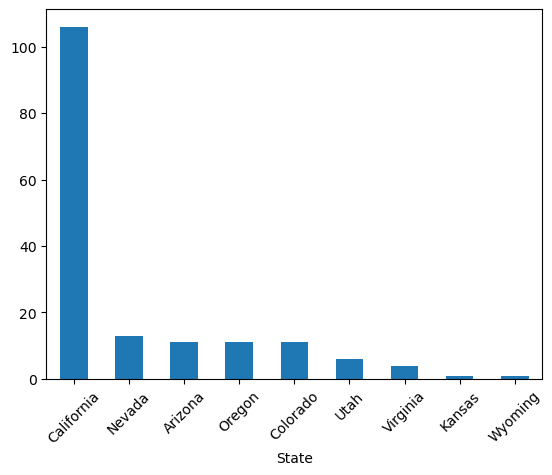

In [14]:
state_data.plot(kind='bar', rot=45)
plt.show()

По географическому признаку большая часть клиентов из Калифорнии

In [16]:
data['Age at time of purchase'].astype('int64') # приводим значение к целочисленному


0      19
1      22
2      22
3      22
4      25
       ..
172    71
173    71
175    73
176    73
177    76
Name: Age at time of purchase, Length: 164, dtype: int64

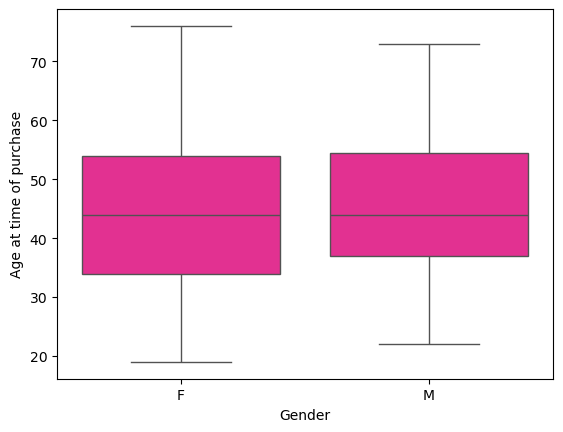

In [17]:
sns.boxplot(data, x="Gender", y="Age at time of purchase", color = "#FF1493")
plt.show()

In [18]:
data['Gender'].value_counts()

Gender
M    99
F    65
Name: count, dtype: int64

In [19]:
avg_age_F = data.query('Gender == "F"') 
avg_age_F['Age at time of purchase'].mean().round()


45.0

In [20]:
avg_age_M = data.query('Gender == "M"') 
avg_age_M['Age at time of purchase'].mean().round()

46.0

В выборке больше мужчин, чем женщин.
По графику бокс плот зависимости возраста и пола видно, что медиана по возрасту для муж и жен находится почти на одном уровне ~ 44 года. При расчете
среднего возраста клиента значение близки к медиане: муж - 46, жен - 45.
Разброс по возрасту у женщин ,больше, чем у мужчин.
Также видно, что одинаковый интервал по возрасту для жен и муж с наибольшим количством клиентос ~ 37 -54 года

In [22]:
data['Price'] = data['Price'].str.replace(',','')
 #удалить знак $ и запятую


C:\Users\user\AppData\Local\Temp\ipykernel_4676\336513319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace(',','')


In [23]:
data['Price'] = data['Price'].str.replace('$','')

C:\Users\user\AppData\Local\Temp\ipykernel_4676\1081175820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('$','')


In [24]:
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [25]:
data['Price'] =data.Price.astype('float64') # тип числа изменяем

C:\Users\user\AppData\Local\Temp\ipykernel_4676\1348917563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] =data.Price.astype('float64') # тип числа изменяем


In [26]:

data['Price_th'] = (data['Price']/1000).round(2) #много значений стоимости, делим на 1000, чтобы на графике видны были значения. Добавлен столбец

C:\Users\user\AppData\Local\Temp\ipykernel_4676\976369168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_th'] = (data['Price']/1000).round(2) #много значений стоимости, делим на 1000, чтобы на графике видны были значения. Добавлен столбец


In [27]:
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Price_th
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,6.0,21.0,F,USA,California,Home,5,No,Website,246.17
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,2.0,24.0,F,USA,California,Home,5,No,Website,246.33
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,12.0,27.0,M,USA,California,Home,1,Yes,Client,209.28
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,12.0,27.0,M,USA,California,Investment,3,Yes,Website,452.67
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,5.0,15.0,F,USA,California,Home,4,No,Agency,467.08


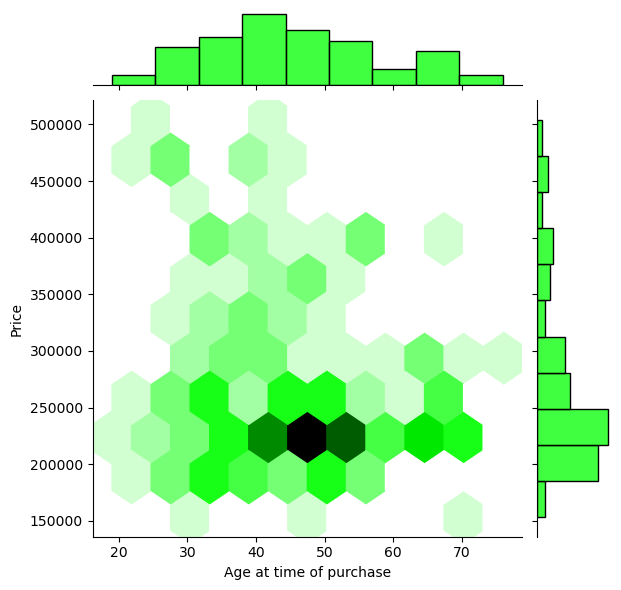

In [28]:
sns.jointplot(x='Age at time of purchase', y='Price', 
              data=data, kind='hex', color = '#00FF00')
plt.show()

In [29]:
data['Price'].mean().round(2) #средний чек при покупке недвижимости

270654.08

In [30]:
maximum = data['Price'].max() #макс чек при покупке недвижимости
max_price = data.query('Price == @maximum')
max_price[['Gender', 'Age at time of purchase', 'Price']] 

,Gender,Age at time of purchase,Price
11,M,26.0,503790.23


In [31]:
minimum = data['Price'].min() #макс чек при покупке недвижимости
min_price = data.query('Price == @minimum')
min_price[['Gender', 'Age at time of purchase', 'Price']] 

,Gender,Age at time of purchase,Price
167,M,68.0,153466.71


График показывает, что наибольшее количеством недвижимости куплено клиентами в возрасте от 45-50 лет. Клиентами в возрасте от 24-27 и 37-44 была покупка недвижимости с наибольшей стоимостью. Расчет минимальной и максимальной суммы на покупку недвижимости это подтвержает.
На графике видно, что наибольшее количество недвижимости покупается по стоимости в 220 -270 тыс. Среднее значение цены на купленную недвижемость попадает в этот интервал

In [33]:
price_f_m = data[['Price', 'Gender']].groupby('Gender').sum()
price_f_m

,Price
Gender,
F,17345023.59
M,27042246.22


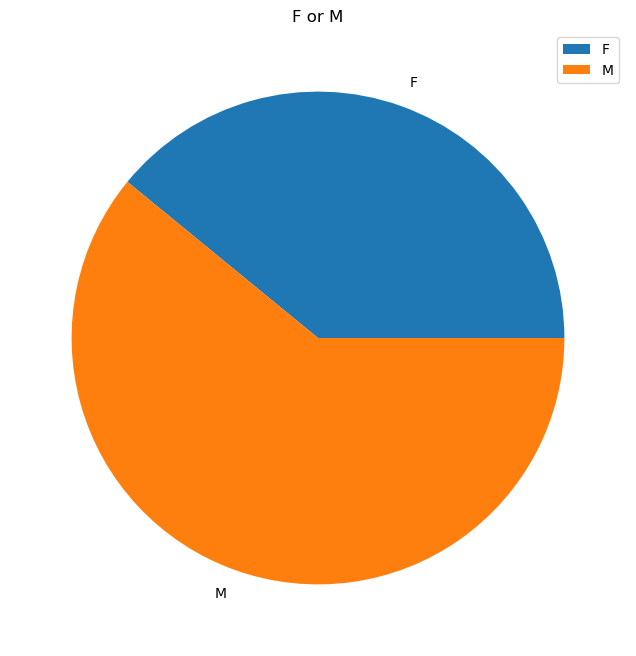

In [34]:
price_f_m.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("F or M")
plt.ylabel("")
plt.show()


По диаграмме видим, что большее количество ден.средств агенство получило от мужчин. Возможно, такой результат получен, так как количество жен менбшн, чем муж:

M    99
F    65

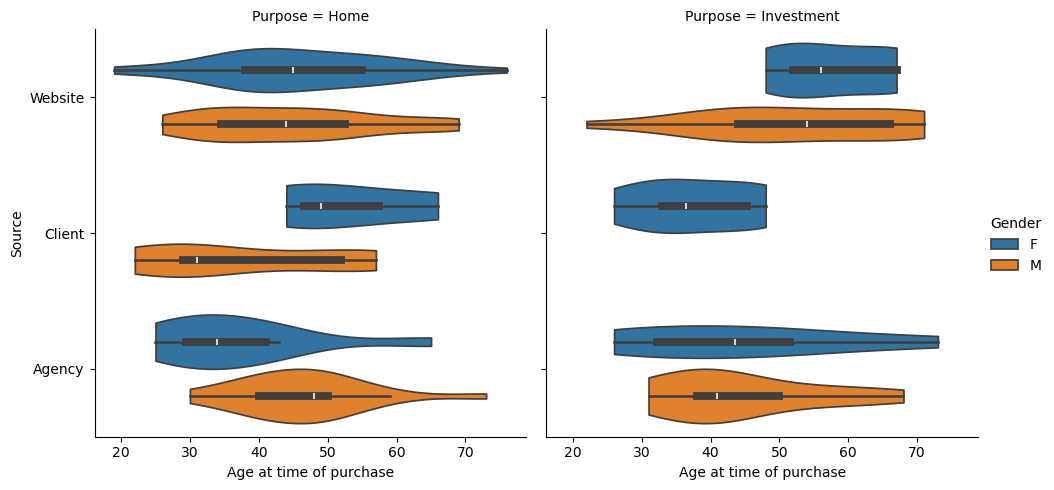

In [36]:
sns.catplot(x="Age at time of purchase", y="Source",
            hue="Gender", col="Purpose",
            data=data,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0)

In [37]:
data['Purpose'].value_counts()


Purpose
Home          114
Investment     50
Name: count, dtype: int64

In [38]:
data['Type of property'].value_counts()

Type of property
Apartment    162
Office         2
Name: count, dtype: int64

При визуализации, как и при расчете, видно, что большая часть недвижимости куплена для проживания (Home - ). 
При расчете получаем, что почти все клиенты покупают Apartment.



In [40]:
source_data = data['Source'].value_counts
source_data

<bound method IndexOpsMixin.value_counts of 0      Website
1      Website
2       Client
3      Website
4       Agency
        ...   
172    Website
173    Website
175     Agency
176     Agency
177    Website
Name: Source, Length: 164, dtype: object>

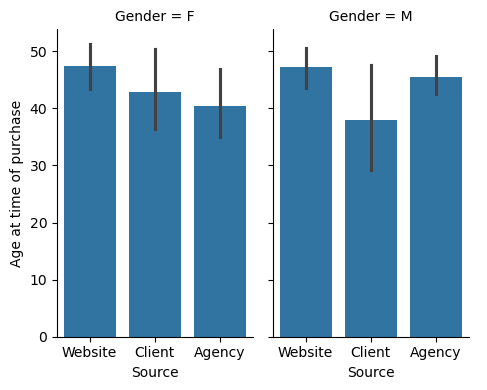

In [41]:
sns.catplot(
    data=data, x="Source", y="Age at time of purchase", col="Gender",
    kind="bar", height=4, aspect=.6,
)

По гистограмме видим, что информацию об агенстве большая часть муж и жен получают через Website, через Client  информацию получают больше жен, чем муж, а через Agency -информацию получают больше муж, чем жен
Большая часть клиентов получают информацию через Website

In [43]:
area_data = data[['Price','Area (ft.)', 'Age at time of purchase']]
area_data

,Price,Area (ft.),Age at time of purchase
0,246172.68,743.09,19.0
1,246331.90,756.21,22.0
2,209280.91,587.28,22.0
3,452667.01,1604.75,22.0
4,467083.31,1375.45,25.0
...,...,...,...
172,219865.76,697.89,71.0
173,204292.49,670.89,71.0
175,222867.42,743.41,73.0
176,291494.36,923.21,73.0


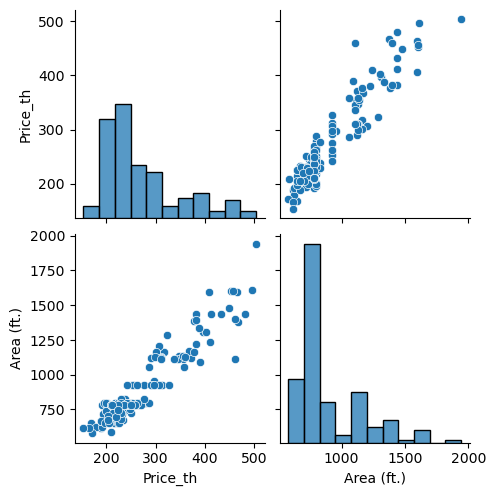

In [44]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    data[['Price_th', 'Area (ft.)']]);
sns_plot.savefig('pairplot.png')

plt.show()

In [45]:
max_area = data['Area (ft.)'].max() #макс площадь покупки
max_area

1942.5

In [46]:
min_area = data['Area (ft.)'].min() #минимальная площадь покупки
min_area



579.75

In [47]:
mean_area = data['Area (ft.)'].mean()#средняя площадь покупки
mean_area

903.6807317073171

На диаграмме зависимости цены и площади скопление точек паралельно оси - Price_th, что соответсвует расчитанному среднему значению площади, а также цены (расчет выше)

In [49]:
data['Customer ID'].value_counts().head() #проверка на дубликаты




Customer ID
C0069    3
C0120    2
C0144    2
C0137    2
C0052    2
Name: count, dtype: int64

In [50]:
data.rename(columns= {"Customer ID": "Customer_ID"})

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer_ID,...,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Price_th
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,6.0,21.0,F,USA,California,Home,5,No,Website,246.17
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,2.0,24.0,F,USA,California,Home,5,No,Website,246.33
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,12.0,27.0,M,USA,California,Home,1,Yes,Client,209.28
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,12.0,27.0,M,USA,California,Investment,3,Yes,Website,452.67
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,5.0,15.0,F,USA,California,Home,4,No,Agency,467.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3008,3,2007,6,Apartment,8,697.89,219865.76,Sold,C0103,...,8.0,13.0,M,USA,Oregon,Investment,2,No,Website,219.87
173,3040,3,2007,6,Apartment,40,670.89,204292.49,Sold,C0103,...,8.0,13.0,M,USA,Oregon,Investment,2,No,Website,204.29
175,3009,3,2006,5,Apartment,9,743.41,222867.42,Sold,C0148,...,5.0,5.0,F,USA,California,Investment,5,Yes,Agency,222.87
176,3052,3,2006,3,Apartment,52,923.21,291494.36,Sold,C0172,...,6.0,8.0,M,USA,California,Home,4,Yes,Agency,291.49


data.duplicated().sum()

Наибольшее количество клиентов из Калифорнии. 
Почти все клиенты покупают и аппартаменты в качестве дома и только треть, с целью инвестирования
Средний возраст клиентов у муж 46, у жен 45. Наибольшее количество ден. средств получено
от мужчин и самая дорогая недвижимость куплена мужчиной. Но так как в выборке было больше муж, жен,
поэтому по полу определить точно невозможно, кто больше покупает недвижимости.
Наибольшее количеством недвижимости куплено клиентами в возрасте от 40-55 лет, максимальное  количество недвижимости куплено
клиентами в возрасте 45-50 лет.
Средняя площадь покупки недвижимости - 903 (это видно на графике и при расчет).
Средний чек при покупке недвижимости - 270654.08. Наибольшее количество недвижимости куплено в интервале 200 000 - 300 000.
Большинство клиентов получают информацию об агенстве  через Website.